# Clustering Penguin Species

Dataset: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
penguins = pd.read_csv("penguins.csv")
df = penguins.copy()

In [4]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,214.014620,260.558057,-132.0,190.000,197.00,213.75,5000.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0


In [6]:
df.shape

(344, 5)

In [9]:
df.duplicated().sum()

1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


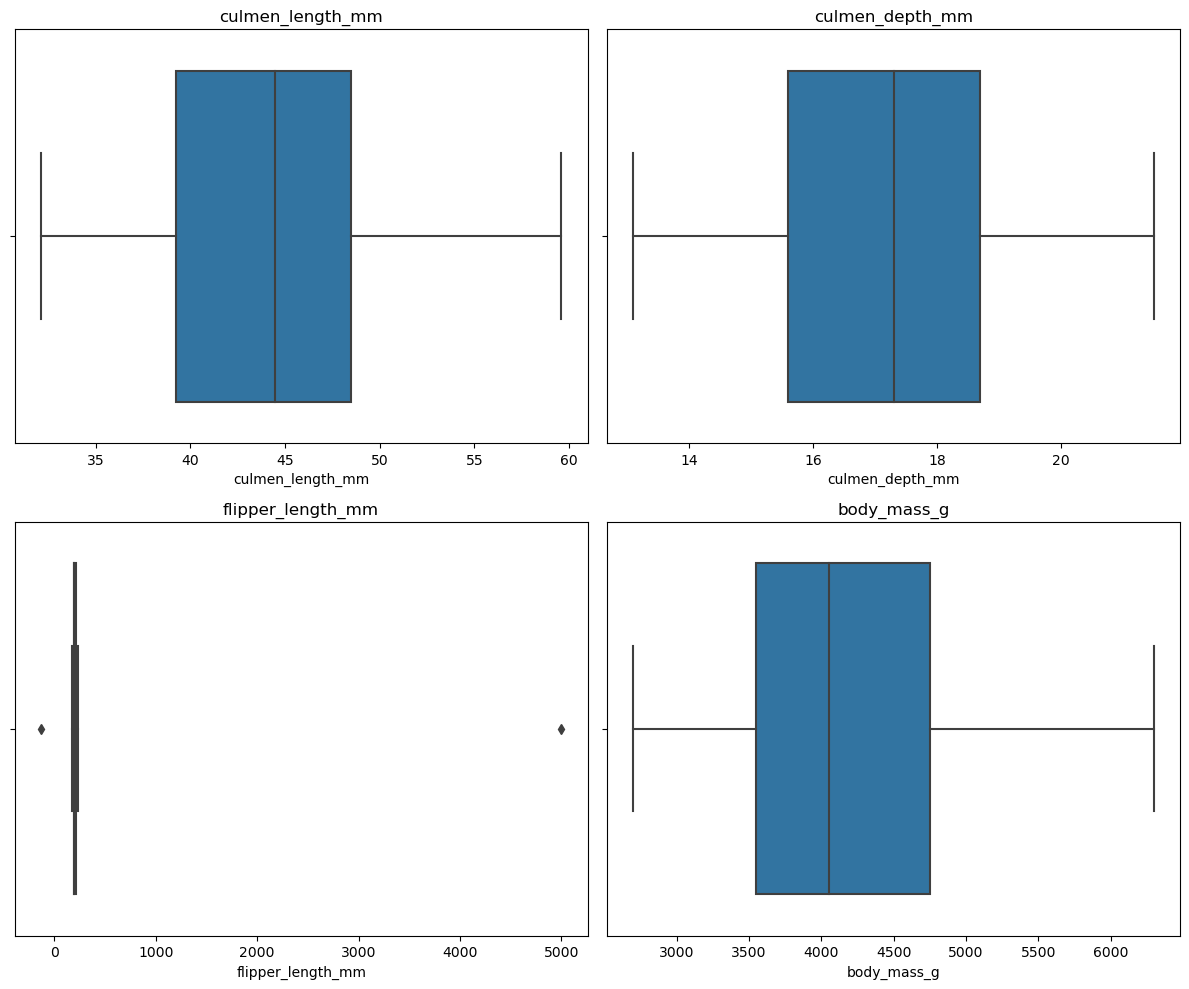

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, column in enumerate(df.drop(columns=["sex"]).columns):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
plt.tight_layout()
plt.show()

In [17]:
# Let's handle the "flipper_length_mm" column

Q1 = df["flipper_length_mm"].quantile(0.25)
Q3 = df["flipper_length_mm"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["flipper_length_mm"] = np.where(df["flipper_length_mm"] < lower_bound, lower_bound, df["flipper_length_mm"])
df["flipper_length_mm"] = np.where(df["flipper_length_mm"] > upper_bound, upper_bound, df["flipper_length_mm"])

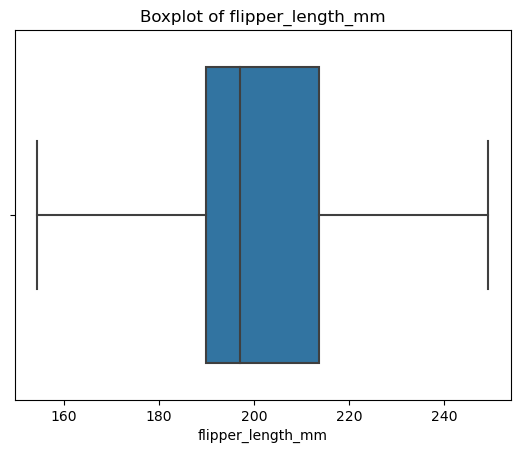

In [18]:
sns.boxplot(data=df, x=df["flipper_length_mm"])
plt.title("Boxplot of flipper_length_mm")
plt.show()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.100,39.225,44.45,48.50,59.600
culmen_depth_mm,342.0,17.151170,1.974793,13.100,15.600,17.30,18.70,21.500
flipper_length_mm,342.0,200.961257,14.511854,154.375,190.000,197.00,213.75,249.375
body_mass_g,342.0,4201.754386,801.954536,2700.000,3550.000,4050.00,4750.00,6300.000


In [25]:
df["sex"].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [26]:
df = df[df["sex"] != "."]

In [27]:
df["sex"].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

## Analyzing Relationships

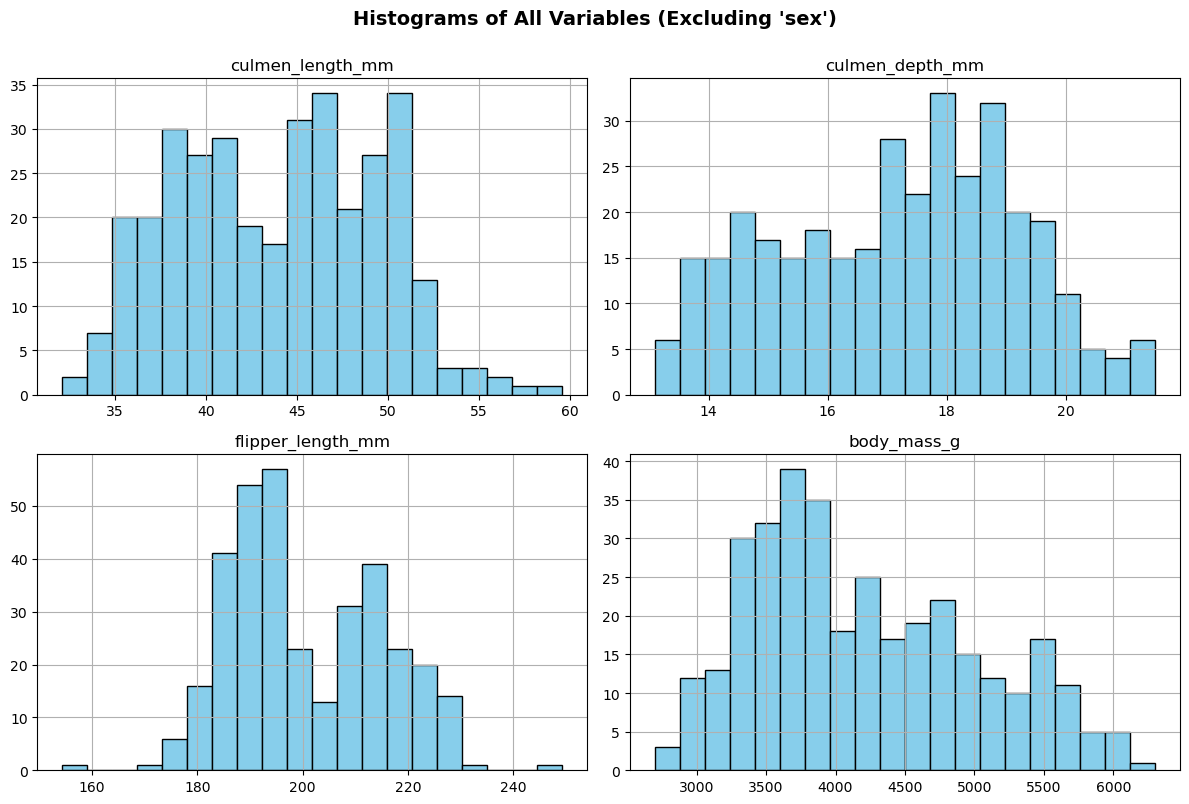

In [87]:
df.drop(columns=["sex"]).hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Variables (Excluding 'sex')", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

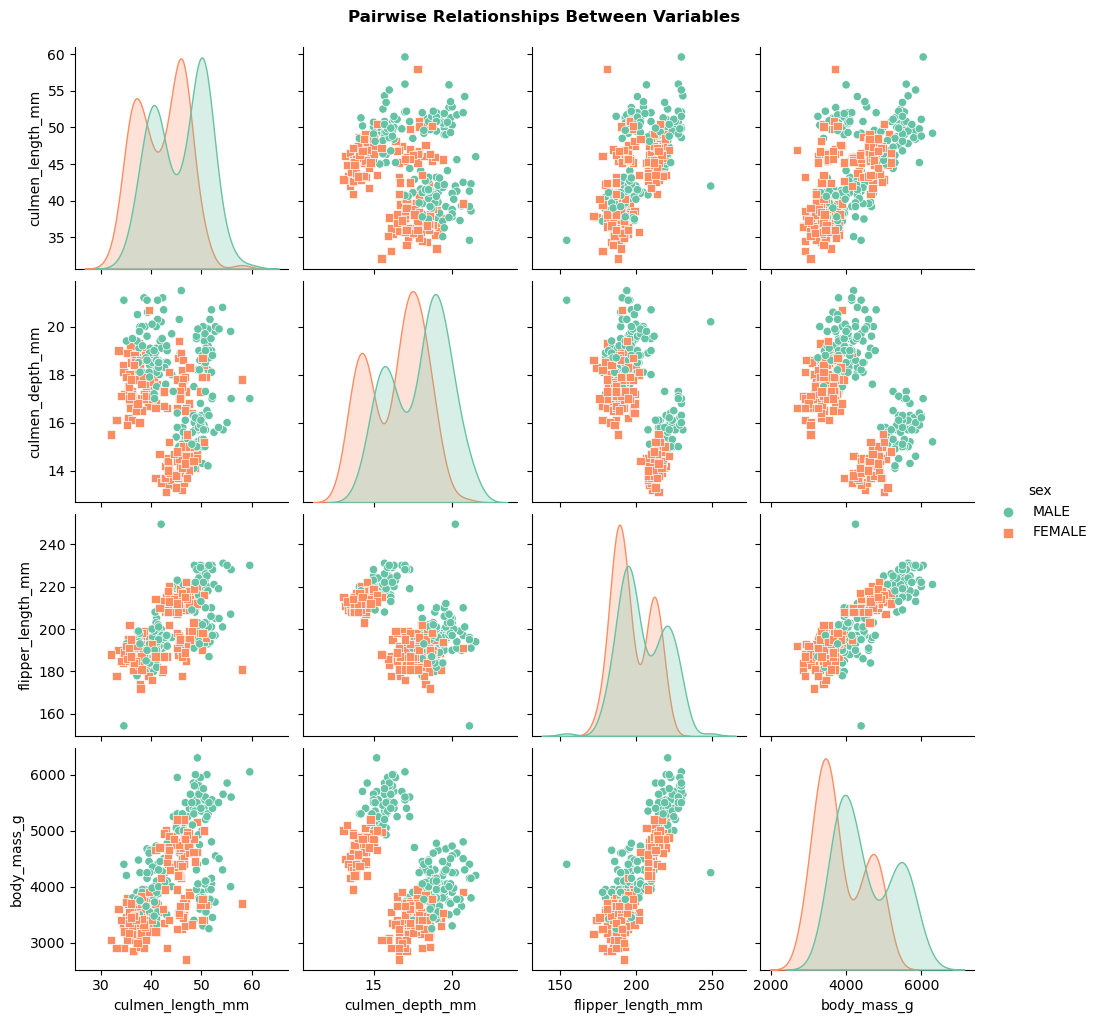

In [88]:
sns.pairplot(df, hue="sex", palette="Set2", markers=["o", "s"])
plt.suptitle("Pairwise Relationships Between Variables", fontsize=12, fontweight='bold', y=1.02)
plt.show()

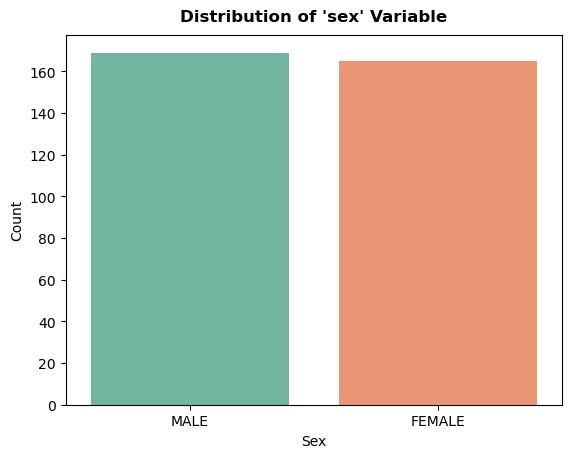

In [91]:
sns.countplot(x="sex", data=df, palette="Set2")
plt.title("Distribution of 'sex' Variable", fontsize=12, fontweight='bold', pad=10)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [93]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

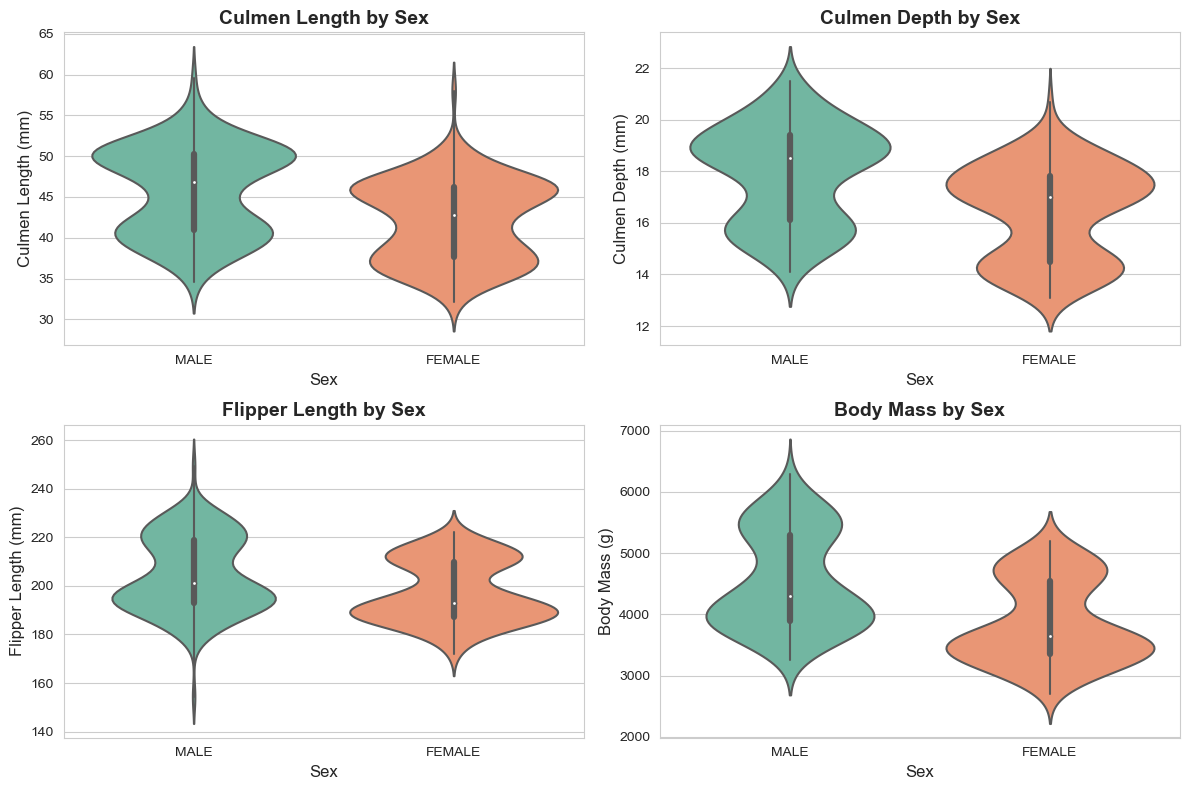

In [97]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Culmen Length vs Sex
sns.violinplot(data=df, x="sex", y="culmen_length_mm", palette="Set2", legend=False, ax=axes[0, 0])
axes[0, 0].set_title("Culmen Length by Sex", fontsize=14, fontweight="bold")
axes[0, 0].set_xlabel("Sex", fontsize=12)
axes[0, 0].set_ylabel("Culmen Length (mm)", fontsize=12)

# Culmen Depth vs Sex
sns.violinplot(data=df, x="sex", y="culmen_depth_mm", palette="Set2", legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Culmen Depth by Sex", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("Sex", fontsize=12)
axes[0, 1].set_ylabel("Culmen Depth (mm)", fontsize=12)

# Flipper Length vs Sex
sns.violinplot(data=df, x="sex", y="flipper_length_mm", palette="Set2", legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Flipper Length by Sex", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel("Sex", fontsize=12)
axes[1, 0].set_ylabel("Flipper Length (mm)", fontsize=12)

# Body Mass vs Sex
sns.violinplot(data=df, x="sex", y="body_mass_g", palette="Set2", legend=False, ax=axes[1, 1])
axes[1, 1].set_title("Body Mass by Sex", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Sex", fontsize=12)
axes[1, 1].set_ylabel("Body Mass (g)", fontsize=12)

plt.tight_layout()
plt.show()